In [3]:
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
plt.rcParams['text.color'] = 'white'
import warnings

warnings.filterwarnings('ignore')

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import scikitplot as skplt
from sklearn.metrics import classification_report

In [5]:
files={'yelp':'yelp_labelled.txt',
       'amazon':'amazon_cells_labelled.txt',
       'imdb':'imdb_labelled.txt'}


df_list=[]
for k,v in files.items():
    path= r'C:/Users/rahul/Videos/Sentimental_Analysis/'+v
    
    df = pd.read_csv(path,names=['sentence','label'],sep='\t')
    df['source']=k
    df_list.append(df)
df = pd.concat(df_list)


In [6]:
df.head()

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


In [7]:
df.rename(columns={'sentence':'reviews'}, inplace=True)

In [8]:
df['reviews_lowercase'] = df.loc[:,'reviews'].str.lower()

In [9]:
df.drop('reviews', axis=1, inplace=True)

In [10]:
import string
punct = string.punctuation
print(punct)

def remove_puntuations(text):
    return text.translate(str.maketrans('','',punct))

df['final_data'] = df['reviews_lowercase'].apply(remove_puntuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [11]:
df.drop('reviews_lowercase', axis=1, inplace=True)

In [12]:
df.head()

,label,source,final_data
0,1,yelp,wow loved this place
1,0,yelp,crust is not good
2,0,yelp,not tasty and the texture was just nasty
3,1,yelp,stopped by during the late may bank holiday of...
4,1,yelp,the selection on the menu was great and so wer...


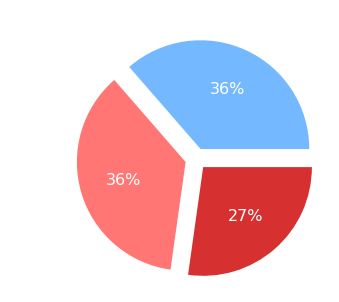

In [13]:
categories = ['yelp', 'amazon', 'imdb']
size = df['source'].value_counts()


explode = (0.1, 0.1, 0.1)
custom_colors = ['#74b9ff', '#ff7675', '#d63031']



plt.figure(figsize=(5,5))
plt.pie(size, autopct='%1.0f%%', explode=explode, labels=categories, textprops={'fontsize' : 16}, colors=custom_colors)
plt.title("Distribution of data")
plt.show()

In [14]:
vectorizer = CountVectorizer(stop_words='english')

In [15]:
all_features = vectorizer.fit_transform(df.final_data)

In [16]:
all_features.shape

(2748, 5118)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(all_features, df.label, test_size = 0.20, random_state=100)

In [18]:
classifier = MultinomialNB()

In [19]:
classifier.fit(x_train, y_train)

MultinomialNB()

In [20]:
nr_correct = (y_test == classifier.predict(x_test)).sum()

In [21]:
print(f'{nr_correct} sentences classified correctly')

448 sentences classified correctly


In [22]:
nr_incorrect = y_test.size - nr_correct

print(f'Number of sentences incorrectly classified is {nr_incorrect}')

Number of sentences incorrectly classified is 102


In [23]:
fraction_of_wrong = nr_incorrect / (nr_correct + nr_incorrect)

print(f'The (testing) accuracy of the model is {1-fraction_of_wrong:.2%}')

The (testing) accuracy of the model is 81.45%


In [33]:
print(f'The Accuracy Score on test data {classifier.score(x_test, y_test):.2%}')

The Accuracy Score on test data 81.45%


In [25]:
pred = classifier.predict(x_test)

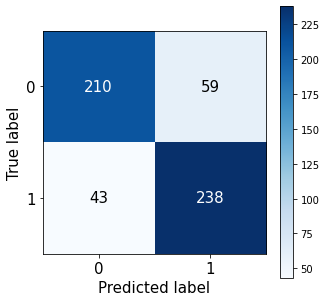

In [26]:
skplt.metrics.plot_confusion_matrix(y_test, pred, figsize=(5,5), title_fontsize=(10), text_fontsize=(15))
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini')
rf.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
print(f'The Accuracy Score on test data using random forest classifier {rf.score(x_test, y_test):.2%}')

The Accuracy Score on test data using random forest classifier 79.27%


In [28]:
y_pred_rf = rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       269
           1       0.83      0.75      0.79       281

    accuracy                           0.79       550
   macro avg       0.80      0.79      0.79       550
weighted avg       0.80      0.79      0.79       550



In [29]:
rf_correct = (y_test == rf.predict(x_test)).sum()
print(f'{rf_correct} sentences classified correctly')

436 sentences classified correctly


In [35]:
rf_incorrect = y_test.size - rf_correct

print(f'Number of sentences incorrectly classified is {rf_incorrect}')

Number of sentences incorrectly classified is 114


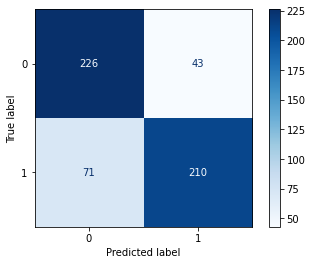

In [30]:
from sklearn import metrics
metrics.plot_confusion_matrix(rf, x_test, y_test, cmap='Blues')
plt.show()

In [31]:
example = ['i hate you',
           'i love you',
          'i hate america',
          'i hate everyone',
          'product is bad',
          'not all bad',
          'boom boom hate']


doc_to_word_mat = vectorizer.transform(example)
classifier.predict(doc_to_word_mat)

array([0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
example = ['i hate you',
           'i love you',
          'i hate america',
          'i hate everyone',
          'product is bad',
          'not all bad',
          'boom boom hate']


doc_to_word_mat = vectorizer.transform(example)
rf.predict(doc_to_word_mat)

array([0, 1, 0, 0, 0, 0, 0], dtype=int64)